In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from IPython.display import display
import os
#plt.style.use("seaborn")
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

In [88]:
cac_data = pd.read_csv('cac_dataset\customer_acquistion_costs.csv')
cac_data.sample(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
28880,Electrical,Household,Non-Consumable,10.53,4.4226,3.0,Price Smashers,Canada,S,M,...,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Street Handout,95.45
18822,Snack Foods,Snack Foods,Food,3.80,1.5580,5.0,Price Winners,Mexico,S,M,...,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Product Attachment,86.79
16686,Seafood,Seafood,Food,2.37,1.1139,3.0,Bye Bye Baby,USA,S,M,...,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Radio,90.58
417,Bread,Baked Goods,Food,3.96,1.7424,3.0,Big Time Discounts,USA,S,F,...,22063.0,4923.0,3282.0,0.0,0.0,0.0,0.0,0.0,In-Store Coupon,59.40
55539,Snack Foods,Snack Foods,Food,4.62,1.8942,2.0,Weekend Markdown,Mexico,S,M,...,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,TV,89.90


In [89]:
cac_data.shape

(60428, 40)

In [90]:
cac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [91]:
cac_data.isna().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [92]:
cac_data.describe().T.style.bar(subset=['mean'], color='#E68193').background_gradient(subset=['std'], cmap='mako_r').background_gradient(subset=['50%'], cmap='mako')

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),60428.000000,6.541031,3.463047,0.510000,3.810000,5.940000,8.670000,22.920000
store_cost(in millions),60428.000000,2.619460,1.453009,0.163200,1.500000,2.385600,3.484025,9.726500
unit_sales(in millions),60428.000000,3.093169,0.827677,1.000000,3.000000,3.000000,4.000000,6.000000
total_children,60428.000000,2.533875,1.490165,0.000000,1.000000,3.000000,4.000000,5.000000
avg_cars_at home(approx),60428.000000,2.200271,1.109644,0.000000,1.000000,2.000000,3.000000,4.000000
num_children_at_home,60428.000000,0.829351,1.303424,0.000000,0.000000,0.000000,1.000000,5.000000
avg_cars_at home(approx).1,60428.000000,2.200271,1.109644,0.000000,1.000000,2.000000,3.000000,4.000000
SRP,60428.000000,2.115258,0.932829,0.500000,1.410000,2.130000,2.790000,3.980000
gross_weight,60428.000000,13.806433,4.622693,6.000000,9.700000,13.600000,17.700000,21.900000
net_weight,60428.000000,11.796289,4.682986,3.050000,7.710000,11.600000,16.000000,20.800000


##### The above helps realise that there is a huge difference in the scale of the columns which might affect distance based machine learning models

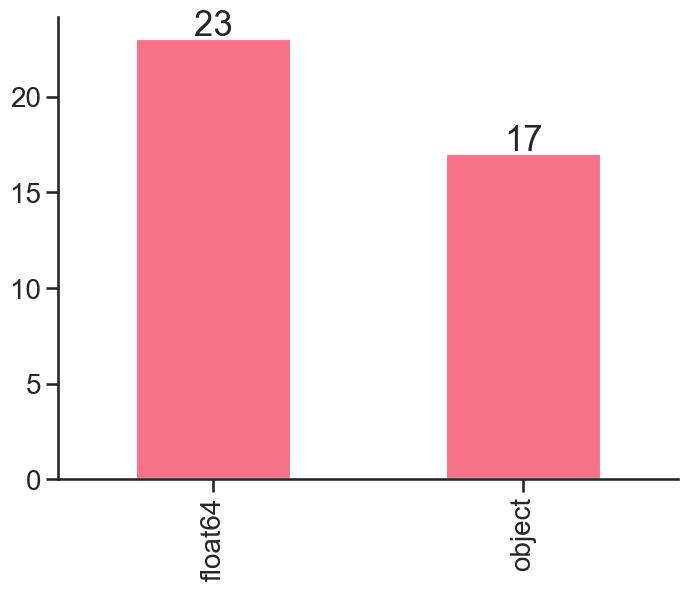

In [93]:
sns.set(style="ticks", context="talk",font_scale = 1,palette="husl")
plt.figure(figsize = (8,6))
ax = cac_data.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.2, height, ha = 'center', size = 25)
sns.despine()

In [94]:
cac_columns = cac_data.columns

In [95]:
categorical_features = cac_data.select_dtypes(include="object").columns
numerical_features = cac_data.select_dtypes(exclude="object").columns

In [96]:
categorical_features

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [97]:
numerical_features

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

store_sales(in millions) : 1033
store_cost(in millions) : 9919
unit_sales(in millions) : 6
total_children : 6
avg_cars_at home(approx) : 5
num_children_at_home : 6
avg_cars_at home(approx).1 : 5
SRP : 315
gross_weight : 376
net_weight : 332
recyclable_package : 2
low_fat : 2
units_per_case : 36
store_sqft : 20
grocery_sqft : 20
frozen_sqft : 20
meat_sqft : 20
coffee_bar : 2
video_store : 2
salad_bar : 2
prepared_food : 2
florist : 2
cost : 328


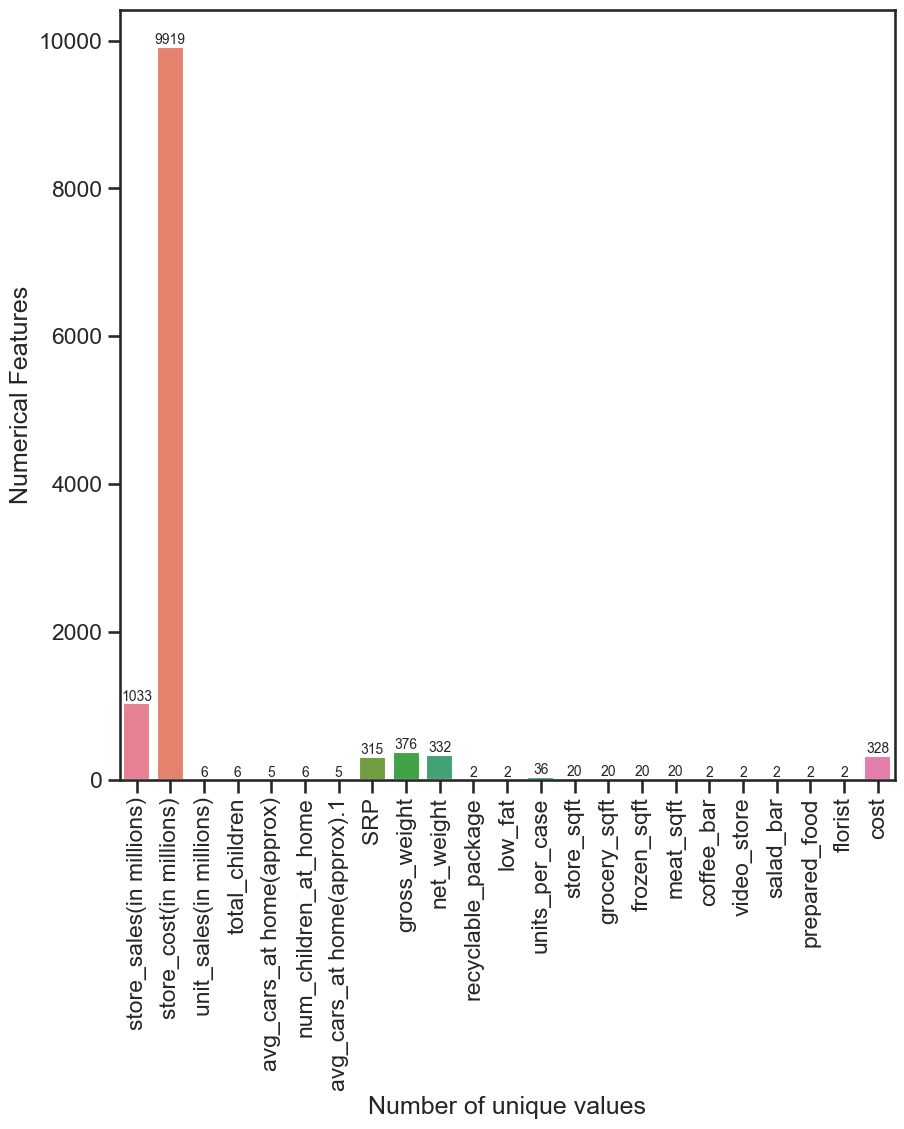

In [98]:
numerical_categories = cac_data[numerical_features].nunique()
for col in numerical_features:
    print(f'{col} : {numerical_categories[col]}')

plt.figure(figsize = (10,10))
plt.xlabel('Number of unique values')
plt.xticks(rotation = 90)
plt.ylabel('Numerical Features')
ax = sns.barplot(x = numerical_features, y = numerical_categories, palette = 'husl')
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 10)

food_category : 45
food_department : 22
food_family : 3
promotion_name : 49
sales_country : 3
marital_status : 2
gender : 2
education : 5
member_card : 4
occupation : 5
houseowner : 2
avg. yearly_income : 8
brand_name : 111
store_type : 5
store_city : 19
store_state : 10
media_type : 13


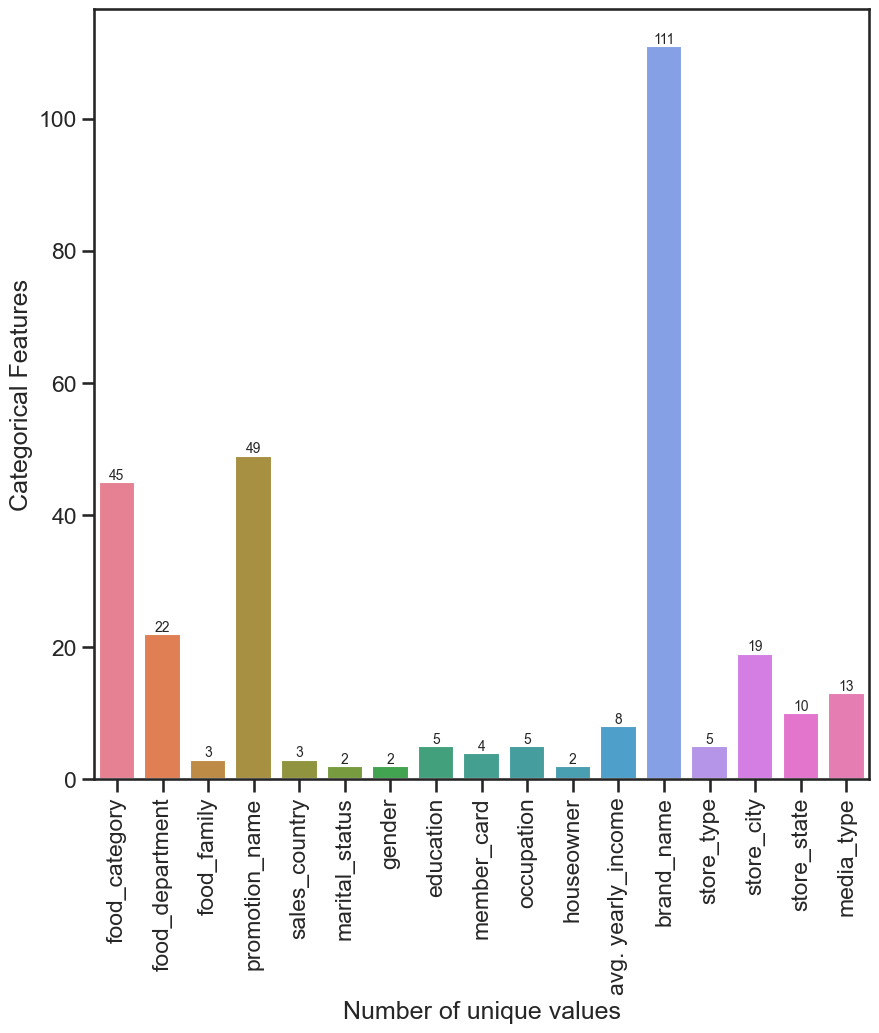

In [99]:
categorical_categories = cac_data[categorical_features].nunique()
for col in categorical_features:
    print(f'{col} : {categorical_categories[col]}')

plt.figure(figsize = (10,10))
plt.xlabel('Number of unique values')
plt.xticks(rotation = 90)
plt.ylabel('Categorical Features')
ax = sns.barplot(x = categorical_features, y = categorical_categories, palette = 'husl')
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 10)

In [100]:
categories_dictionary = {col : list(cac_data[col].unique()) for col in categorical_features}
for key in categories_dictionary.keys():
    print(f'{key} : {categories_dictionary[key]}')

food_category : ['Breakfast Foods', 'Bread', 'Canned Shrimp', 'Baking Goods', 'Vegetables', 'Frozen Desserts', 'Candy', 'Snack Foods', 'Dairy', 'Starchy Foods', 'Cleaning Supplies', 'Decongestants', 'Meat', 'Hot Beverages', 'Jams and Jellies', 'Carbonated Beverages', 'Seafood', 'Specialty', 'Kitchen Products', 'Electrical', 'Beer and Wine', 'Candles', 'Fruit', 'Pure Juice Beverages', 'Canned Soup', 'Paper Products', 'Canned Tuna', 'Eggs', 'Hardware', 'Canned Sardines', 'Canned Clams', 'Pain Relievers', 'Side Dishes', 'Bathroom Products', 'Magazines', 'Frozen Entrees', 'Pizza', 'Cold Remedies', 'Canned Anchovies', 'Drinks', 'Hygiene', 'Plastic Products', 'Canned Oysters', 'Packaged Vegetables', 'Miscellaneous']
food_department : ['Frozen Foods', 'Baked Goods', 'Canned Foods', 'Baking Goods', 'Produce', 'Snacks', 'Snack Foods', 'Dairy', 'Starchy Foods', 'Household', 'Health and Hygiene', 'Meat', 'Beverages', 'Seafood', 'Deli', 'Alcoholic Beverages', 'Canned Products', 'Eggs', 'Periodical

##### NO. of children for a customer

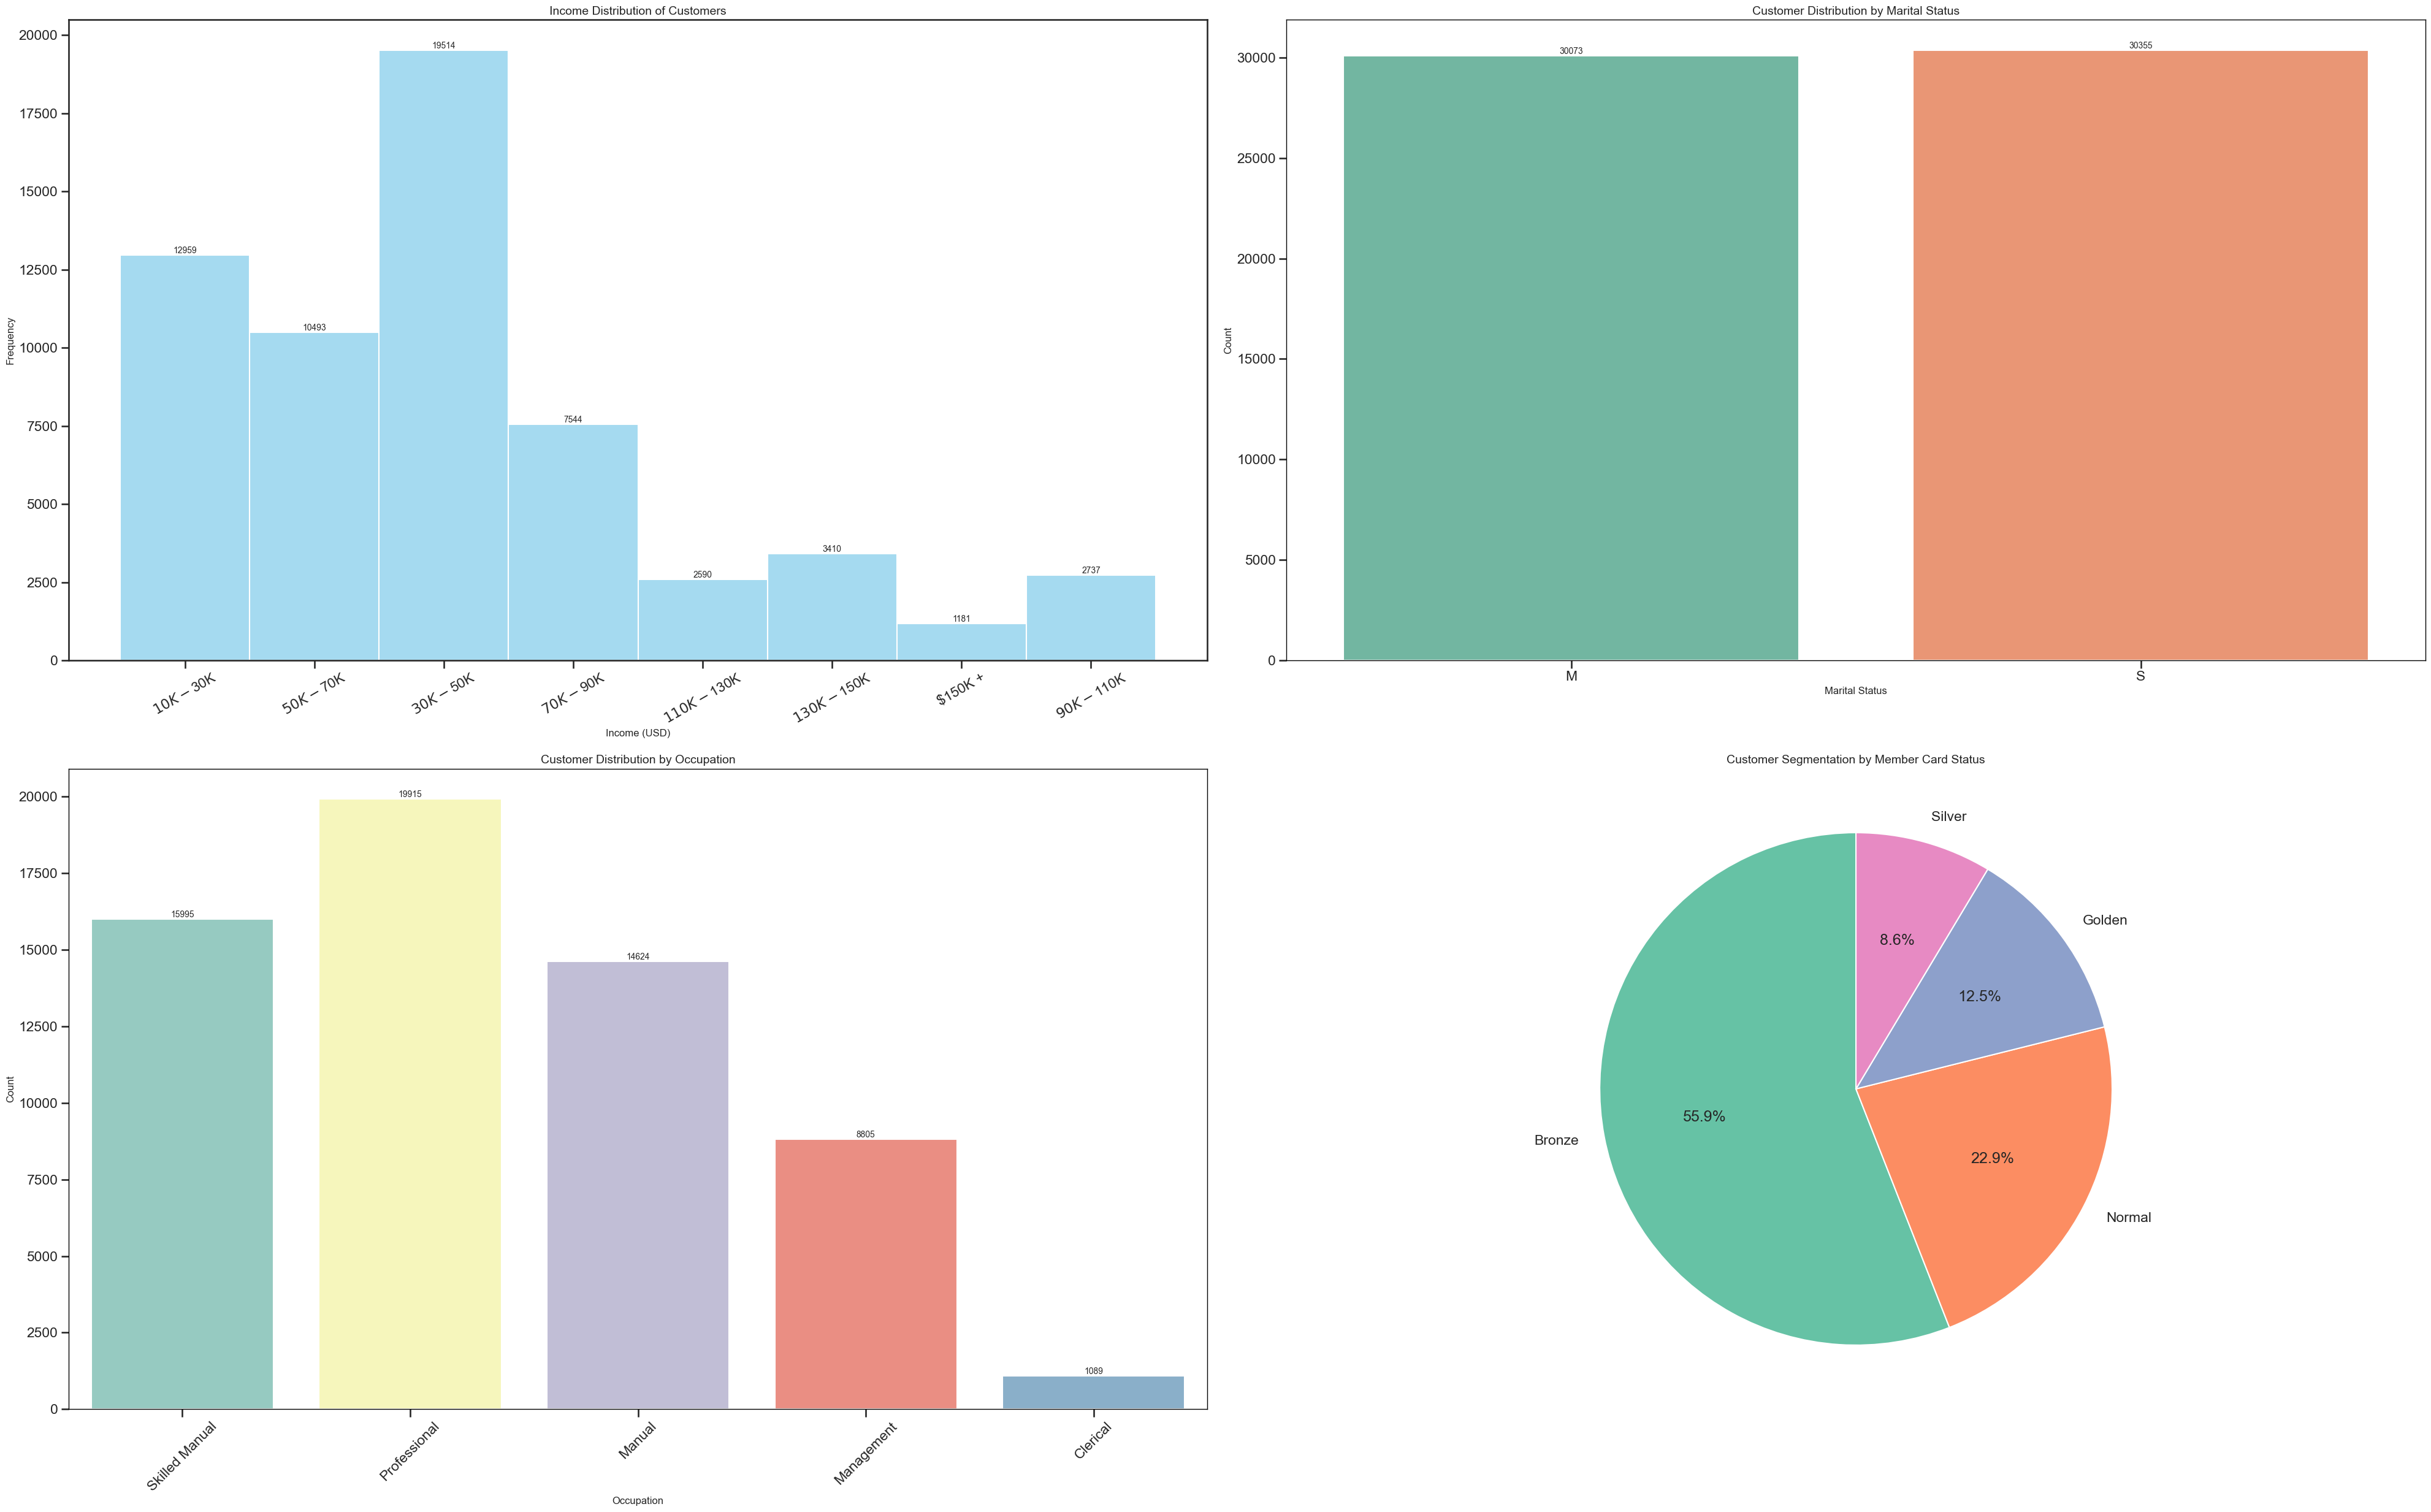

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(40, 25))

# 1. Histogram for Customer Income Distribution
sns.histplot(cac_data['avg. yearly_income'], kde=False, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution of Customers', fontsize=14)
axes[0, 0].set_xlabel('Income (USD)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=30)
for i in axes[0,0].containers:
    axes[0,0].bar_label(i, label_type = 'edge', fontsize = 10)  # Rotate x labels for better readability

# 2. Countplot for Customer Demographics (Marital Status)
sns.countplot(x='marital_status', data=cac_data, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Customer Distribution by Marital Status', fontsize=14)
axes[0, 1].set_xlabel('Marital Status', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
for i in axes[0,1].containers:
    axes[0,1].bar_label(i, label_type = 'edge', fontsize = 10)
# Add borders around the plot
for spine in axes[0, 1].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

# 3. Countplot for Customer Occupation
sns.countplot(x='occupation', data=cac_data, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Customer Distribution by Occupation', fontsize=14)
axes[1, 0].set_xlabel('Occupation', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability
for i in axes[1,0].containers:
    axes[1,0].bar_label(i, label_type = 'edge', fontsize = 10)
# Add borders around the plot
for spine in axes[1, 0].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

# 4. Pie Chart for Customer Segmentation (Member Card Status)
customer_segments = cac_data['member_card'].value_counts()
axes[1, 1].pie(customer_segments, autopct='%1.1f%%', colors=sns.color_palette('Set2'), labels=customer_segments.index, startangle=90)
axes[1, 1].set_title('Customer Segmentation by Member Card Status', fontsize=14)
# Add borders around the pie chart
for spine in axes[1, 1].spines.values():
    spine.set_edgecolor('black')  # Set the color of the border
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.show()